In [1]:
# varactor at resonaotor

# this is just an easy approximation to make some dependencies clear (like scan range vs coupling capacity and so on)
# ATTENTION!
# This does not(!) include all the circuitry and a SPICE simulation is highly recommended! 
# For example: the V_ctrl has to be connected via a decoupling resistor, so cable (and maybe filter) capacities are
# not included in the LC circuit. The higher the resistor the better, but on the other hand the slower the voltage
# actually builds up at the varactor and theirfor shifting the resonator can take quite a while. We took 100 Meg and
# have a 40k/22n filter before which is still quite fast (sub seconds). 1Gig would be better for Q-values but takes
# longer.
# Another thing: If you check the datasheet of you varactor diode, you will probably find an equivalent circuit where
# there is a resistor in series on the anode side of the varactor capacity. This resistance will significantly alter
# your resonator Q value and can be calculated roughly using the varactor Q value from its datasheet. Having multiple
# varactors in parallel actually helps to reduce the effect on the resonator and, depending on you coupling capacity,
# can also increase your resonator scan range.

"""
                  out
__________________|_____C_couple____________________V_ctrl
|     |                            |      |
L     C_trap                       C_v    N*...
|     |                            |      |
|_____|____________________________|______|_________GND


That was faster to make than it looks :)
"""


'\n                  out\n__________________|_____C_couple____________________V_ctrl\n|     |                            |      |\nL     C_trap                       C_v    N*...\n|     |                            |      |\n|_____|____________________________|______|_________GND\n\n\nThat was faster to make than it looks :)\n'

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

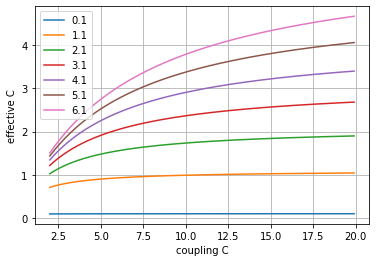

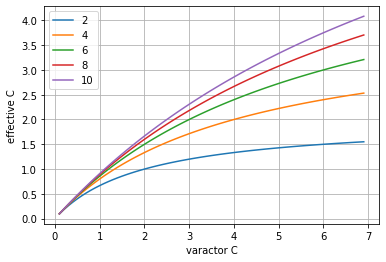

In [3]:
def Ceff(Ccouple, Cvar, Cboard=0):
    return 1/(1/Ccouple + 1/(Cvar + Cboard))

cc = np.arange(2, 20, 0.1)

for i in np.arange(0.1, 7, 1):
    plt.plot(cc, Ceff(cc*1e-12, i*1e-12)/1e-12, label=str(i))
plt.legend()
plt.xlabel("coupling C")
plt.ylabel("effective C")
plt.grid()
plt.show()

cvar = np.arange(0.1, 7, 0.1)

for i in np.arange(2, 12, 2):
    plt.plot(cvar, Ceff(i*1e-12, cvar*1e-12)/1e-12, label=str(i))
plt.legend()
plt.xlabel("varactor C")
plt.ylabel("effective C")
plt.grid()
plt.show()

def CfromRes(L, nures):
    return 1/L/(nures*2*np.pi)**2



In [53]:
    
def nu_res(L=5e-3, Ctrap=20e-12, nu_res_original=None, Ccouple=4.0e-12, Cvarmin=1e-12, Cvarmax=7e-12, Nvar=1):
    if nu_res_original is not None:
        #print("Ctrap", Ctrap)
        Ctrap = CfromRes(L, nu_res_original)
        print("Ctrap", Ctrap)
    C_all_min = Ctrap + Ceff(Ccouple, Cvarmin*Nvar)
    C_all_max = Ctrap + Ceff(Ccouple, Cvarmax*Nvar)
    
    return 1/np.sqrt(L*C_all_min)/2/np.pi, 1/np.sqrt(L*C_all_max)/2/np.pi

In [38]:
numax, numin = nu_res()

In [39]:
print(numin, numax, numax-numin)

865456.0222150228 901037.4346677159 35581.4124526931


Ctrap 6.754745576155851e-11
Ctrap 6.754745576155851e-11
Ctrap 6.754745576155851e-11


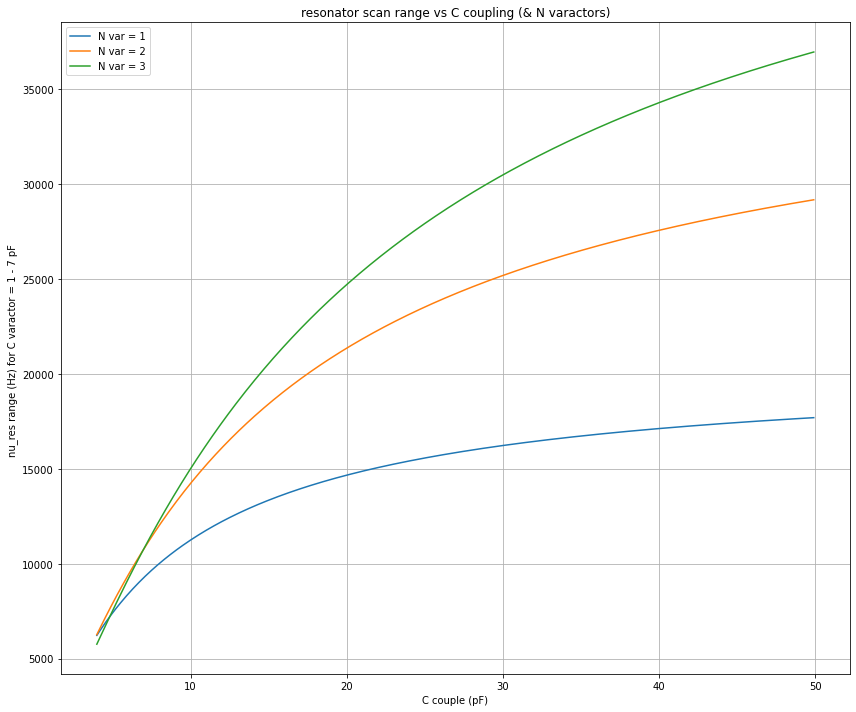

In [40]:
df = pd.DataFrame()
plt.rcParams['figure.figsize'] = (12, 10)

nu_res_original = 500e3
for n in np.arange(1, 4):
    ccs = np.arange(4, 50, 0.1)
    ma = []
    mi = []

    ma, mi = nu_res(Ccouple=ccs*1e-12, nu_res_original=nu_res_original, Nvar=n)
        
    #plt.plot(ns, ma, label="Ccouple= "+str(cc)+"pF")
    #plt.plot(ns, mi, label="Ccouple= "+str(cc)+"pF")
    plt.plot(ccs, np.asarray(ma)-np.asarray(mi), label="N var = "+str(n))

plt.legend()
plt.title("resonator scan range vs C coupling (& N varactors)")
plt.xlabel("C couple (pF)")
plt.grid()
plt.ylabel("nu_res range (Hz) for C varactor = 1 - 7 pF ")
plt.tight_layout()
plt.show()

Ctrap 6.754745576155851e-11
Ctrap 6.754745576155851e-11
Ctrap 6.754745576155851e-11


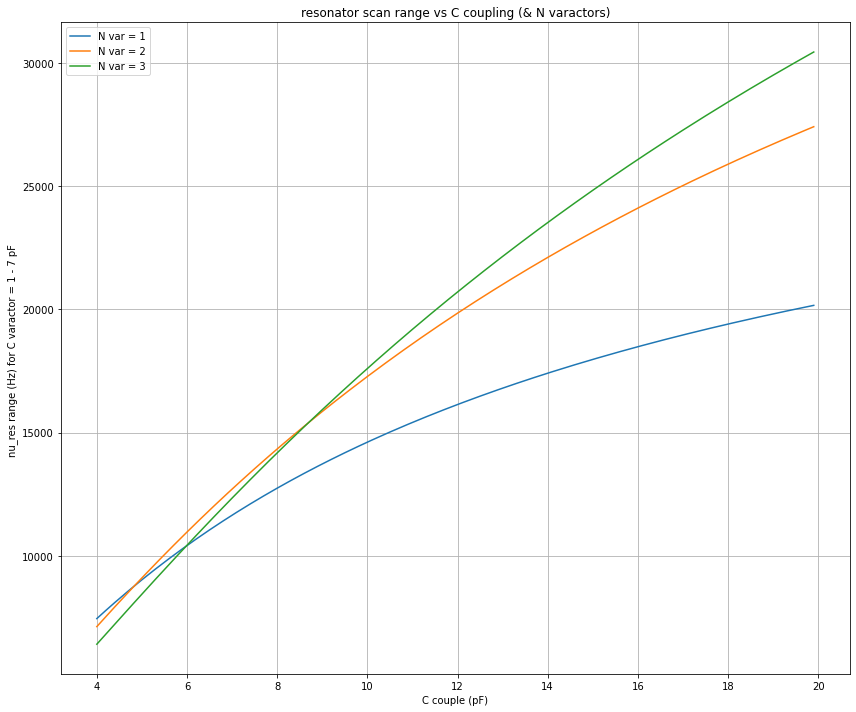

In [41]:
df = pd.DataFrame()
plt.rcParams['figure.figsize'] = (12, 10)

Cvarmin=1e-12
Cvarmax=10.5e-12

for n in np.arange(1, 4):
    ccs = np.arange(4, 20, 0.1)
    ma = []
    mi = []

    ma, mi = nu_res(Ccouple=ccs*1e-12, nu_res_original=nu_res_original, Nvar=n, Cvarmin=Cvarmin, Cvarmax=Cvarmax)
        
    #plt.plot(ns, ma, label="Ccouple= "+str(cc)+"pF")
    #plt.plot(ns, mi, label="Ccouple= "+str(cc)+"pF")
    plt.plot(ccs, np.asarray(ma)-np.asarray(mi), label="N var = "+str(n))

plt.legend()
plt.title("resonator scan range vs C coupling (& N varactors)")
plt.xlabel("C couple (pF)")
plt.grid()
plt.ylabel("nu_res range (Hz) for C varactor = 1 - 7 pF ")
plt.tight_layout()
plt.show()

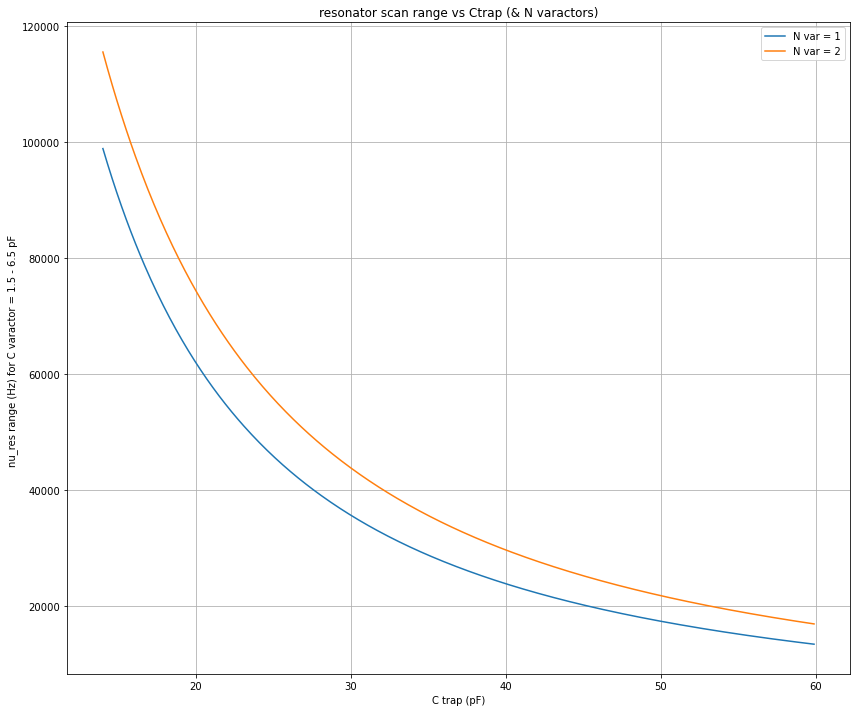

In [42]:
df = pd.DataFrame()
plt.rcParams['figure.figsize'] = (12, 10)

ccouple = 10e-12
ccs = np.arange(14, 60, 0.1)

for n in np.arange(1, 3):
    ma = []
    mi = []

    ma, mi = nu_res(Ctrap=ccs*1e-12, nu_res_original=None, Nvar=n, Ccouple=ccouple)
    #print(ma, mi)
    #plt.plot(ns, ma, label="Ccouple= "+str(cc)+"pF")
    #plt.plot(ns, mi, label="Ccouple= "+str(cc)+"pF")
    plt.plot(ccs, np.asarray(ma)-np.asarray(mi), label="N var = "+str(n))

plt.legend()
plt.title("resonator scan range vs Ctrap (& N varactors)")
plt.grid()
plt.xlabel("C trap (pF)")
plt.ylabel("nu_res range (Hz) for C varactor = 1.5 - 6.5 pF ")
plt.tight_layout()
plt.show()

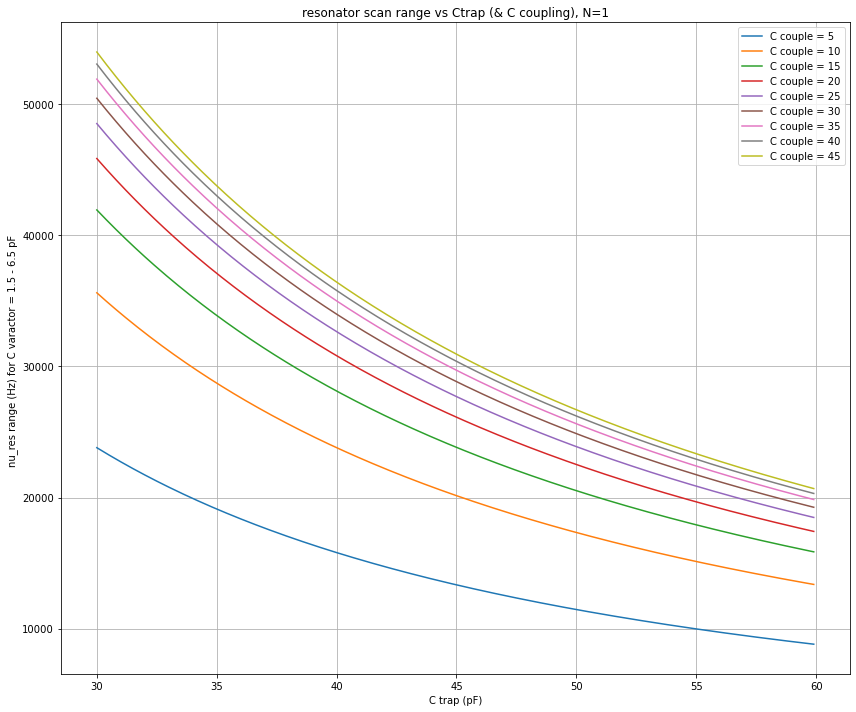

In [43]:
df = pd.DataFrame()
plt.rcParams['figure.figsize'] = (12, 10)

for cc in np.arange(5, 50, 5):
    cts = np.arange(30, 60, 0.1)
    ma = []
    mi = []

    ma, mi = nu_res(Ctrap=cts*1e-12, nu_res_original=None, Nvar=1, Ccouple=cc*1e-12)
        
    #plt.plot(ns, ma, label="Ccouple= "+str(cc)+"pF")
    #plt.plot(ns, mi, label="Ccouple= "+str(cc)+"pF")
    plt.plot(cts, np.asarray(ma)-np.asarray(mi), label="C couple = "+str(cc))

plt.legend()
plt.title("resonator scan range vs Ctrap (& C coupling), N=1")
plt.xlabel("C trap (pF)")
plt.grid()
plt.ylabel("nu_res range (Hz) for C varactor = 1.5 - 6.5 pF ")
plt.tight_layout()
plt.show()

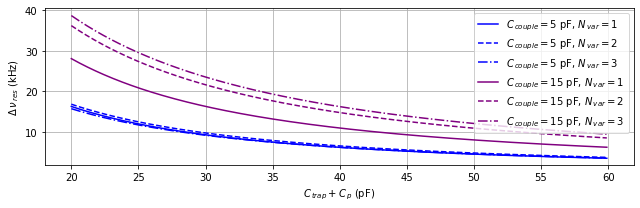

In [54]:
df = pd.DataFrame()
plt.rcParams['figure.figsize'] = (9, 3)

styles = ["-", "--", "-."]

ccs = np.arange(5, 20, 10)
amount = len(ccs)

for i, cc in enumerate(np.arange(5, 20, 10)):
    for nn in [1,2,3]:
        cts = np.arange(20, 60, 0.1)
        ma = []
        mi = []

        ls = styles[nn-1]
        ma, mi = nu_res(Ctrap=cts*1e-12, nu_res_original=None, Nvar=nn, Ccouple=cc*1e-12)

        c = [float(i)/float(amount), 0.0, float(amount-i)/float(amount)] 
        #plt.plot(ns, ma, label="Ccouple= "+str(cc)+"pF")
        #plt.plot(ns, mi, label="Ccouple= "+str(cc)+"pF")
        plt.plot(cts, (np.asarray(ma)-np.asarray(mi))/1e3, label=r"$C_{\, couple} = $"+str(cc)+" pF, "+r"$N_{\, var} = $"+str(nn), ls =ls, color=c)

plt.legend()
#plt.title("resonator scan range vs Ctrap (& C coupling), N=2")
plt.xlabel(r"$C_{\, trap} + C_{\, p}$ (pF)")
plt.grid()
plt.ylabel(r"$\Delta\, \nu_{\, res}$ (kHz)")
plt.tight_layout()
plt.savefig("varactor_sim.pdf", dpi=100, patch=0.5)
plt.show()

In [12]:
# changes in Uvar resulting in changes in nu-res

In [13]:

def nu_res2(L=3e-3, Ctrap=40e-12, Ccouple=3.9e-12, Cvar=6.5e-12, Uvar=20, Nvar=1):
    C_all = Ctrap + 1/(1/Ccouple + 1/(Cvar-0.3e-12*Uvar)/Nvar)
    return 1/np.sqrt(L*C_all)/2/np.pi

1 850.638457020881 Hz/V
1 0.0011755875739526466 V/Hz
2 1014.7710350032853 Hz/V
2 0.0009854439725871388 V/Hz


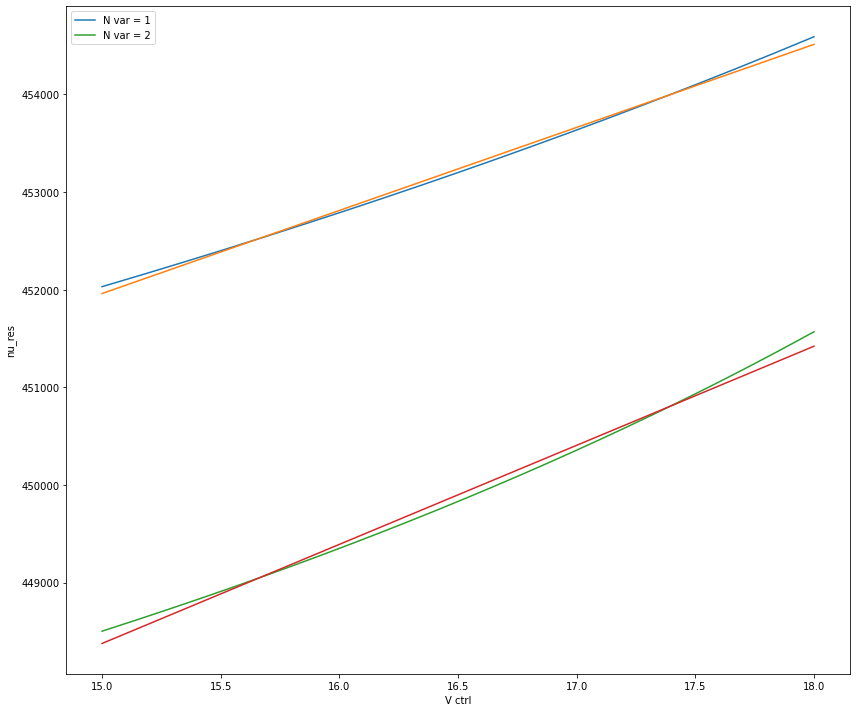

In [14]:
df = pd.DataFrame()
plt.rcParams['figure.figsize'] = (12, 10)

for n in np.arange(1, 3):
    vctrls = []
    nus = []
    
    for varctrlV in np.arange(15, 18, 1e-4):
        
        nu = nu_res2(Uvar=varctrlV, Nvar=n)
        vctrls.append(varctrlV)
        nus.append(nu)
    
    plt.plot(vctrls, nus, label="N var = "+str(n))
    fitresults = np.polyfit(vctrls, nus, 1)
    plt.plot(vctrls, np.polyval(fitresults[:], vctrls))
    
    print(n, fitresults[0], 'Hz/V')
    print(n, 1/fitresults[0], 'V/Hz')

plt.legend()
plt.xlabel("V ctrl")
plt.ylabel("nu_res")
plt.tight_layout()
plt.show()

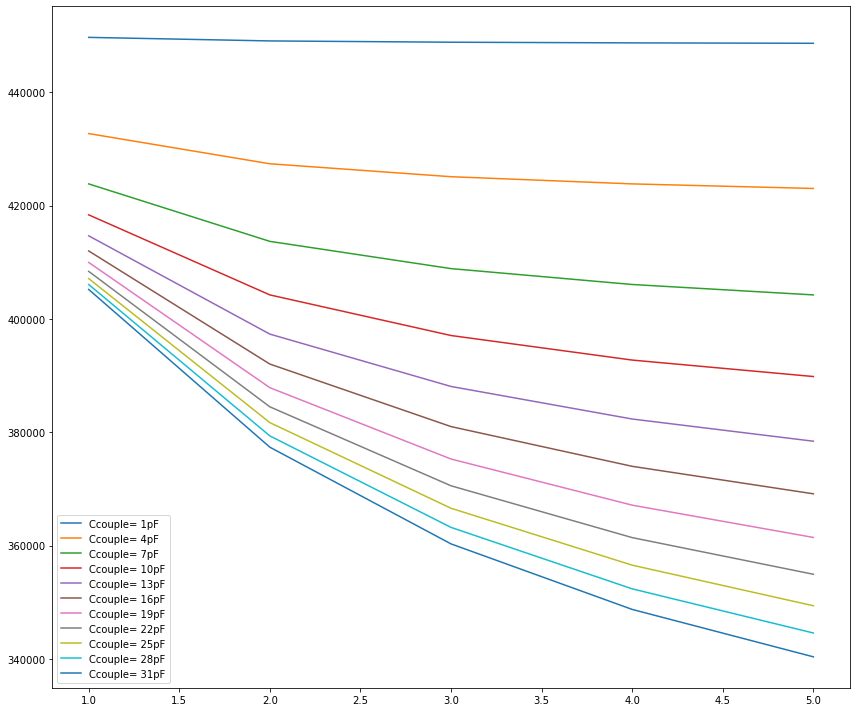

In [15]:
df = pd.DataFrame()
plt.rcParams['figure.figsize'] = (12, 10)
for cc in np.arange(1, 33, 3):
    
    ns = []
    ma = []
    mi = []
    
    for n in np.arange(1, 6):
        numax, numin = nu_res(Ccouple=cc*1e-12, Nvar=n)
        ns.append(n)
        ma.append(numax)
        mi.append(numin)
    
    #plt.plot(ns, ma, label="Ccouple= "+str(cc)+"pF")
    plt.plot(ns, mi, label="Ccouple= "+str(cc)+"pF")
    #plt.plot(ns, np.asarray(ma)-np.asarray(mi), label="Ccouple= "+str(cc)+"pF")

plt.legend()
plt.tight_layout()
plt.show()

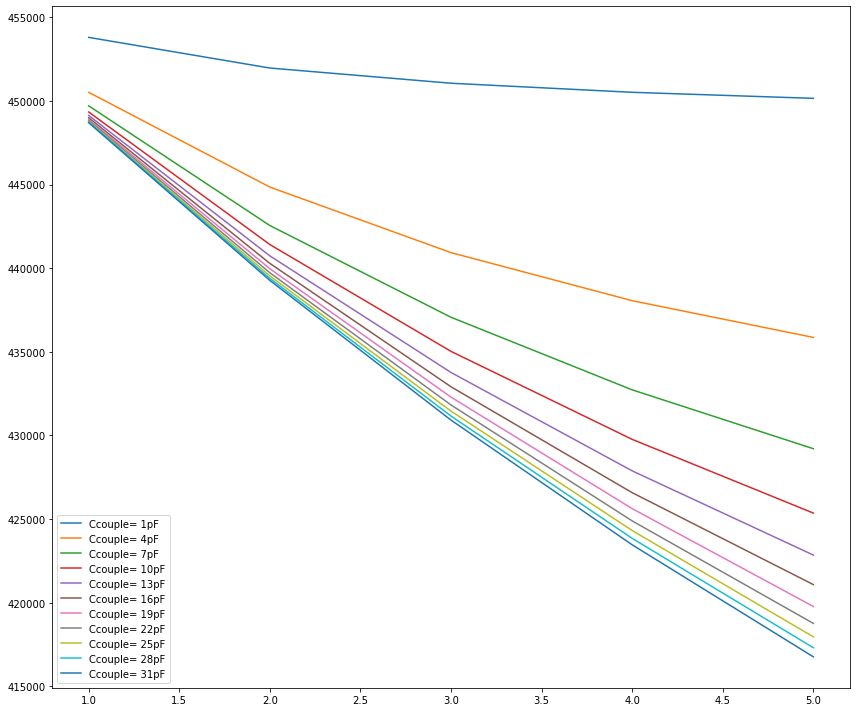

In [16]:
df = pd.DataFrame()
plt.rcParams['figure.figsize'] = (12, 10)
for cc in np.arange(1, 33, 3):
    
    ns = []
    ma = []
    mi = []
    
    for n in np.arange(1, 6):
        numax, numin = nu_res(Ccouple=cc*1e-12, Nvar=n)
        ns.append(n)
        ma.append(numax)
        mi.append(numin)
    
    plt.plot(ns, ma, label="Ccouple= "+str(cc)+"pF")
    #plt.plot(ns, mi, label="Ccouple= "+str(cc)+"pF")
    #plt.plot(ns, np.asarray(ma)-np.asarray(mi), label="Ccouple= "+str(cc)+"pF")

plt.legend()
plt.tight_layout()
plt.show()

In [17]:

""" VOLTAGE SENSOR for "voltage freeze test"

      out                    electrode
______|_________C_couple_____|____________________________V_electrode
|     |                      |       |        |      |
L     C_res                  Crfdiv  C_trap   C_v    N*...
|     |                      |       |        |      |
|_____|______________________|_______|________|______|____GND


"""


def nu_res_sense(L=3e-3, Cres=5e-12, Ccouple=100e-12, Crf=1e-12, Ctrap=1e-12, Cvarmin=1.5e-12, Cvarmax=6.5e-12, Nvar=1):
    C_all_min = Cres + 1/(1/Ccouple + 1/(Cvarmin*Nvar + Ctrap + Crf))
    C_all_max = Cres + 1/(1/Ccouple + 1/(Cvarmax*Nvar + Ctrap + Crf))
    
    return 1/np.sqrt(L*C_all_min)/2/np.pi, 1/np.sqrt(L*C_all_max)/2/np.pi

(136095.50320043252, 90907.75684525384)


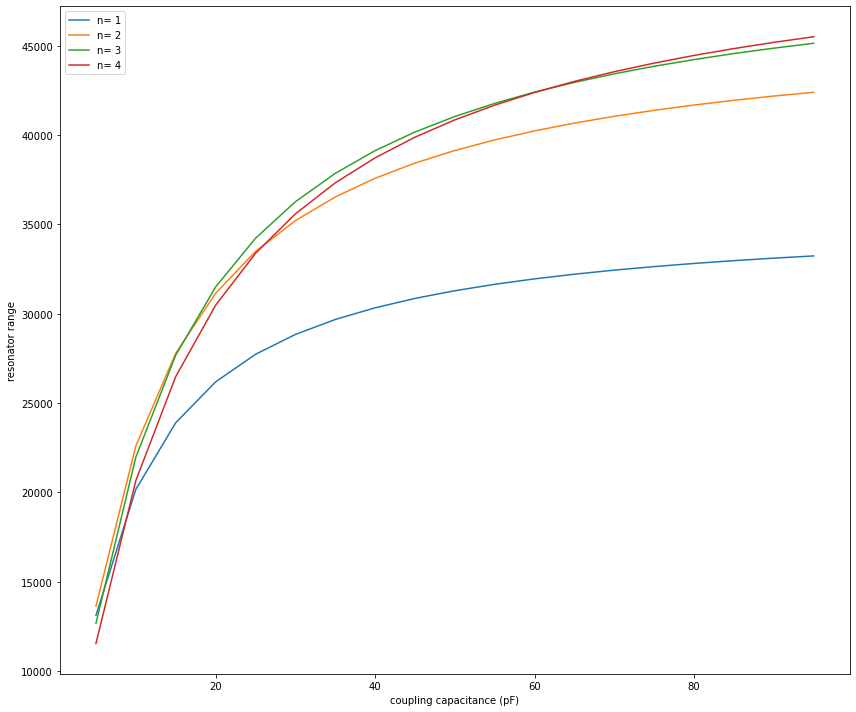

In [18]:
# axial
L = 3e-3
# cyclotroon
#L = 1e-6
# warm big coil
L = 0.1

print(nu_res_sense(L=L, Ccouple=100e-12, Nvar=5))

df = pd.DataFrame()
plt.rcParams['figure.figsize'] = (12, 10)

for n in np.arange(1, 5, 1):

    ccs = []
    ma = []
    mi = []
    diff = []
    reldiff = []
    
    for cc in np.arange(5, 100, 5):

        numax, numin = nu_res_sense(L=L, Ccouple=cc*1e-12, Nvar=n)
        ccs.append(cc)
        ma.append(numax)
        mi.append(numin)
        diff.append( numax-numin )
        reldiff.append( (numax-numin)/np.mean([numax, numin]) )
    
    plt.plot(ccs, diff, label="n= "+str(n))
    #plt.plot(ccs, reldiff, label="n= "+str(n))

plt.xlabel('coupling capacitance (pF)')
plt.ylabel('resonator range')
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
# what voltage stability do we need ?
# 1-7pF more or less linear over 20V range

In [20]:

def c_var_dres(L=3e-3, Ctrap=29e-12, Ccouple=12e-12, nu_res=500e3, Nvar=1):
    alpha = 1/(L*(nu_res)**2) - Ctrap
    beta = 1/alpha -1/Ccouple
    return 1/beta/Nvar

In [21]:
var = c_var_dres()
print(var)

-1.2111426360588083e-11


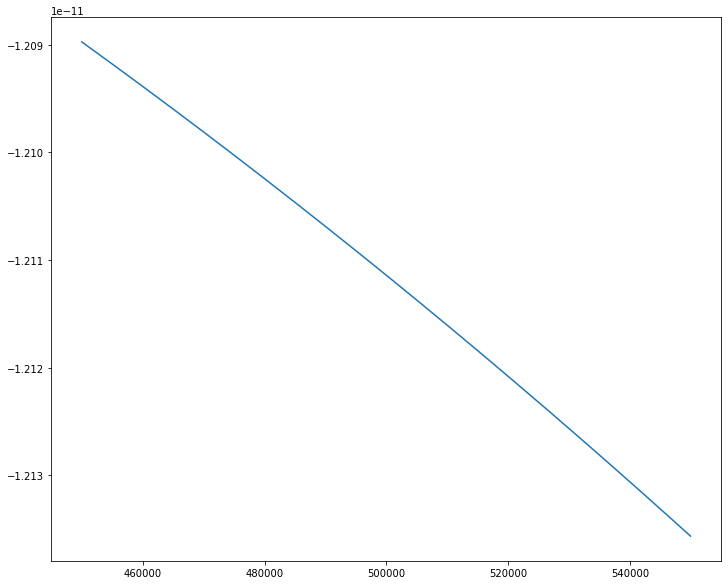

In [22]:
Cvarlist = []
nurange = np.arange(450e3, 550e3, 100)
for nu in nurange:
    
    Cvarlist.append(c_var_dres(nu_res=nu))

plt.plot(nurange, Cvarlist)
plt.show()
